### Project - Machine Learing Part (Supervised and Unsupervised)

##### Dataset - 1
You have the first dataset (personality_test.csv). This dataset contains the answers of various people for 50 different questions related to personality.

Here I will provide a very brief explanation for these questions:
<li> First 10 Questions: extroversion</li>
<li> Next 10 Questions: neurotic</li>
<li> Next 10 Questions: agreeable</li>
<li> Next 10 Questions: conscientious</li>
<li> Next 10 Questions: open</li>

Your task is to analyze the dataset and group them based on the similar features. Apply any of the clustering algorithm and find the optimum number of clusters. In order to see the clusters visually, you need to apply PCA and reduce the dimensions of the dataset.

Moreover, as optionally, you can also take the input for very questions from the user and let them know how thier personality is.

<i>NOTE: The info.txt file contains more information about the data, if needed you can take help from there </i>

In [1]:
import pandas as pd

data = pd.read_csv("Personality_test.csv")

In [2]:
data.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [3]:
data = data.drop(columns=['Unnamed: 0'])

In [4]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()

In [7]:
data['country'] = label_encoder.fit_transform(data['country'])

In [8]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,69
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,144
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,69
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,69
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,103


In [9]:
data = data.dropna()

In [10]:
data.shape

(1013558, 51)

In [11]:
sample_data = data.sample(frac=0.01, random_state=1)


In [12]:
sample_data.shape

(10136, 51)

In [13]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [14]:
model = AgglomerativeClustering()

In [15]:
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(sample_data)
visualizer.show()

KeyboardInterrupt: 

In [16]:
model = AgglomerativeClustering(n_clusters=4)
y_model = model.fit_predict(sample_data)

In [18]:
sample_data['Cluster'] = y_model

In [19]:
sample_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,Cluster
301242,4.0,2.0,3.0,5.0,3.0,3.0,3.0,4.0,5.0,4.0,...,4.0,2.0,4.0,2.0,5.0,2.0,5.0,4.0,143,3
1011096,4.0,1.0,4.0,3.0,5.0,1.0,1.0,2.0,4.0,4.0,...,5.0,2.0,3.0,1.0,5.0,2.0,5.0,4.0,35,0
949144,3.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,...,4.0,2.0,3.0,1.0,4.0,5.0,4.0,4.0,69,1
593647,1.0,3.0,4.0,3.0,5.0,2.0,5.0,4.0,1.0,4.0,...,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,208,2
579937,4.0,1.0,4.0,1.0,5.0,1.0,5.0,2.0,5.0,2.0,...,5.0,1.0,5.0,1.0,5.0,2.0,5.0,5.0,51,0


In [20]:
import seaborn as sns

<Axes: xlabel='EXT1', ylabel='EXT2'>

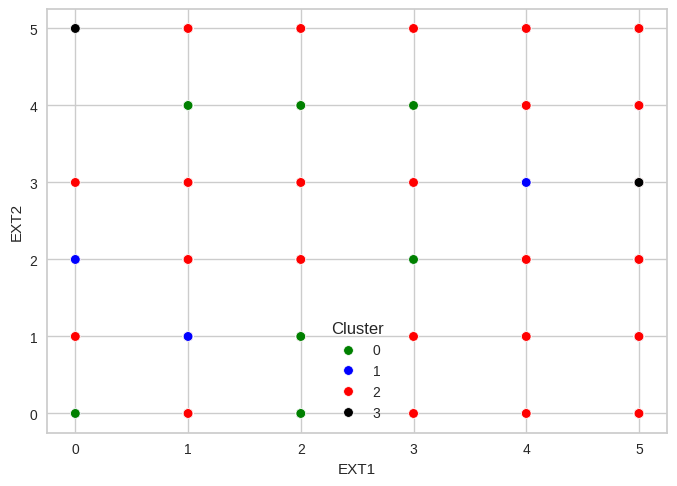

In [21]:
color = ['green', 'blue', 'red', 'black']
sns.scatterplot(data=sample_data, x = 'EXT1', y = 'EXT2', hue='Cluster', palette=color)

<Axes: xlabel='Cluster', ylabel='EXT1'>

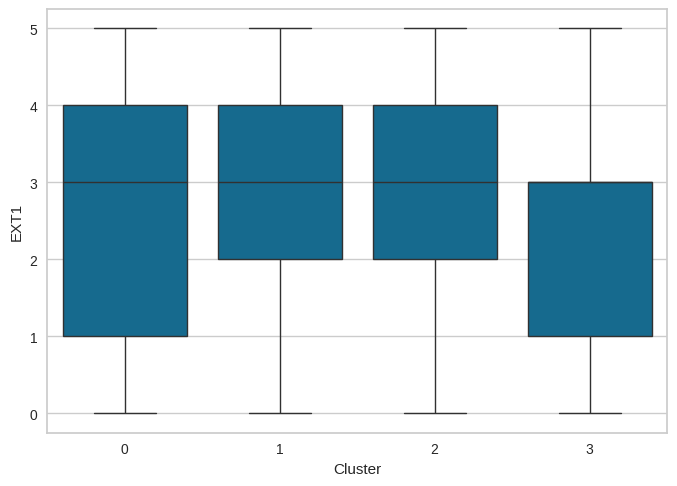

In [22]:
sns.boxplot(data=sample_data, x = 'Cluster', y='EXT1')

In [23]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,69
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,144
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,69
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,69
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,103


<Axes: xlabel='Cluster', ylabel='OPN2'>

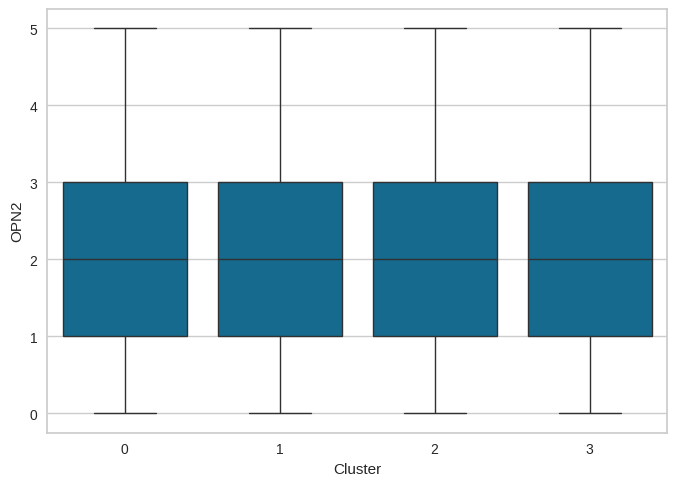

In [24]:
sns.boxplot(data=sample_data, x = 'Cluster', y='OPN2')

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)

In [28]:
PCA_data = pca.fit_transform(sample_data)

In [29]:
sample_data = pd.DataFrame(PCA_data)

In [30]:
sample_data.head()

,0,1
0,9.971034,3.147431
1,117.965842,-1.637554
2,83.980551,2.282731
3,-55.038288,-0.190193
4,101.992873,-2.481193


In [31]:
sample_data['cluster'] = y_model

In [32]:
sample_data.head()

,0,1,cluster
0,9.971034,3.147431,3
1,117.965842,-1.637554,0
2,83.980551,2.282731,1
3,-55.038288,-0.190193,2
4,101.992873,-2.481193,0


In [33]:
sample_data['cluster'].nunique()

4

<Axes: xlabel='0', ylabel='1'>

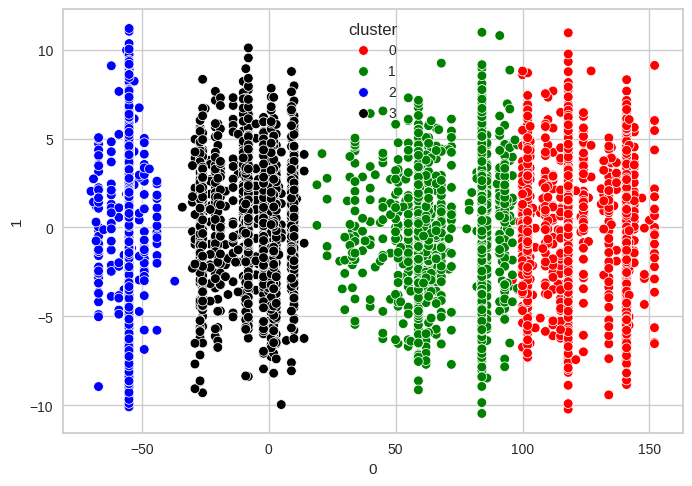

In [34]:
import seaborn as sns
color = ['red', 'green', 'blue','black']
sns.scatterplot(data=sample_data, x=0, y=1, hue='cluster', palette=color)

In [37]:
class QuestionnaireAnalyzer:
    def __init__(self, question_scores):
        self.question_scores = question_scores

    def calculate_category_averages(self):
        category_averages = [0] * 5  # Initialize an array to store category averages
        for i in range(5):
            # Extract scores for the current category
            start_index = i * 10  # Start index of the current category
            end_index = (i + 1) * 10  # End index of the current category
            category_scores = self.question_scores[start_index:end_index]

            # Calculate the average score for the current category
            if category_scores:  # Check if there are scores in the category
                category_averages[i] = sum(category_scores) / len(category_scores)
            else:
                category_averages[i] = 0  # If no scores in the category, set average to 0

        return category_averages



In [38]:
# Example list of 50 scores
question_scores = [3, 4, 5, 6, 7, 8, 9, 10, 3, 2, 4, 5, 6, 7, 8, 9, 10, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 5, 6, 7, 8, 9, 10]

analyzer = QuestionnaireAnalyzer(question_scores)
category_averages = analyzer.calculate_category_averages()

# Print category averages
for i, avg in enumerate(category_averages):
    print(f"Category {i+1} Average: {avg}")

Category 1 Average: 5.7
Category 2 Average: 6.1
Category 3 Average: 6.5
Category 4 Average: 6.9
Category 5 Average: 6.888888888888889


##### Dataset-1
You will also get a csv file named Demand.csv which contains information about the ordering of taxi based on the location, time and date. You need to come up with an accurate predictive model which will help the company to know how much demand is going to be at a specific location at a specific time

In [39]:
data = pd.read_csv("Demand.csv")

In [40]:
data.head()

,lat,long,Radius,days_of_week,Hour,Demand
0,42.92853,74.60041,1.858197,Tuesday,1,0
1,42.92853,74.60041,1.858197,Wednesday,1,2
2,42.92853,74.60041,1.858197,Thursday,1,0
3,42.92853,74.60041,1.858197,Friday,1,0
4,42.92853,74.60041,1.858197,Saturday,1,0


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()

In [43]:
data['days_of_week'] = label_encoder.fit_transform(data['days_of_week'])

In [44]:
data.head()

,lat,long,Radius,days_of_week,Hour,Demand
0,42.92853,74.60041,1.858197,5,1,0
1,42.92853,74.60041,1.858197,6,1,2
2,42.92853,74.60041,1.858197,4,1,0
3,42.92853,74.60041,1.858197,0,1,0
4,42.92853,74.60041,1.858197,2,1,0


In [45]:
from pycaret.regression import *

In [46]:
Step = setup(data=data, target='Demand')

,Description,Value
0,Session id,5113
1,Target,Demand
2,Target type,Regression
3,Original data shape,"(17472, 6)"
4,Transformed data shape,"(17472, 6)"
5,Transformed train set shape,"(12230, 6)"
6,Transformed test set shape,"(5242, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


/usr/local/lib/python3.10/dist-packages/pycaret/internal/metrics.py:51: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [47]:
best_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.5015,90.6302,9.4222,0.5277,0.6510,0.7812,0.5030
gbr,Gradient Boosting Regressor,3.9841,100.8199,9.9281,0.4808,0.7676,1.0366,0.4480
xgboost,Extreme Gradient Boosting,3.6272,99.8988,9.8978,0.4766,0.6675,0.8281,0.1700
rf,Random Forest Regressor,3.7486,106.6937,10.2315,0.4407,0.6891,0.8581,1.2500
dt,Decision Tree Regressor,3.7727,108.3953,10.3160,0.4307,0.6942,0.8650,0.0360
et,Extra Trees Regressor,3.7726,108.3960,10.3160,0.4307,0.6942,0.8651,0.9820
knn,K Neighbors Regressor,4.0377,113.1826,10.5357,0.4096,0.7667,1.0562,0.0550
ada,AdaBoost Regressor,5.9586,159.1707,12.5383,0.1633,1.0287,1.6705,0.0910
br,Bayesian Ridge,6.4207,170.2602,12.9606,0.1104,1.2603,2.0005,0.0290
ridge,Ridge Regression,6.4234,170.2588,12.9605,0.1104,1.2598,2.0054,0.0280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [48]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1972,59.6524,7.7235,0.6367,0.6401,0.7594
1,3.2262,52.6508,7.2561,0.6350,0.6351,0.7031
2,3.3261,80.7047,8.9836,0.3911,0.6431,0.8333
3,3.8091,107.9832,10.3915,0.5168,0.6638,0.8104
4,3.4840,86.4886,9.2999,0.5617,0.6463,0.8453
5,3.4848,81.2890,9.0160,0.4636,0.6442,0.8019
6,3.5395,127.2974,11.2826,0.4799,0.6459,0.7626
7,3.3522,91.3892,9.5598,0.5168,0.6726,0.7102
8,3.9436,140.2171,11.8413,0.5002,0.6666,0.7733


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
lightgbm_tuned = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2698,61.0267,7.8120,0.6284,0.6527,0.8077
1,3.2895,53.3255,7.3024,0.6303,0.6551,0.7636
2,3.3645,77.9573,8.8293,0.4118,0.6541,0.8732
3,3.8913,107.5891,10.3725,0.5186,0.6853,0.8682
4,3.5545,88.2415,9.3937,0.5528,0.6574,0.8989
5,3.4909,76.5478,8.7492,0.4949,0.6504,0.8177
6,3.5748,124.2507,11.1468,0.4924,0.6598,0.8131
7,3.3478,92.2026,9.6022,0.5125,0.6814,0.7418
8,3.9706,136.7198,11.6927,0.5127,0.6788,0.7946


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
evaluate_model(lightgbm_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [52]:
##we will now do our own hyperparamter tuning and thus will create our model outside of pycaret

In [53]:
data.head()

,lat,long,Radius,days_of_week,Hour,Demand
0,42.92853,74.60041,1.858197,5,1,0
1,42.92853,74.60041,1.858197,6,1,2
2,42.92853,74.60041,1.858197,4,1,0
3,42.92853,74.60041,1.858197,0,1,0
4,42.92853,74.60041,1.858197,2,1,0


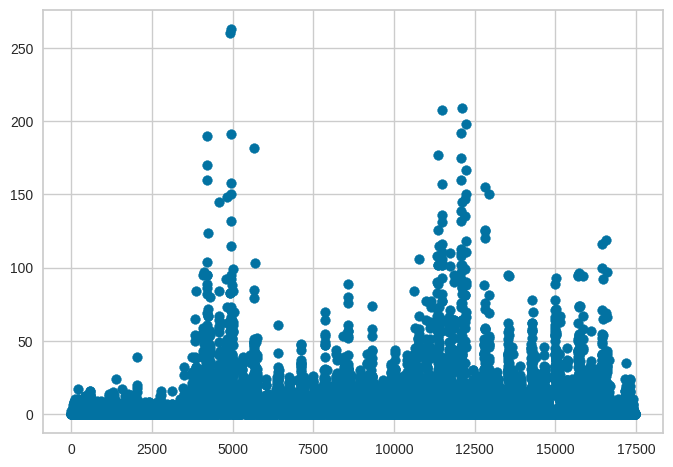

In [68]:
import matplotlib.pyplot as plt
plt.scatter(data.Demand.index, data.Demand)
plt.show()

In [69]:
from sklearn.ensemble import IsolationForest as IF

In [83]:
model = IF(contamination=0.01)

In [84]:
target = pd.DataFrame(data['Demand'])

In [85]:
target.head()

,Demand
0,0
1,2
2,0
3,0
4,0


In [86]:
target.nunique()

Demand    141
dtype: int64

In [87]:
model.fit(target)

IsolationForest(contamination=0.01)

In [88]:
preds = model.predict(target)

In [89]:
df = data.copy()

In [90]:
df['outliers'] = preds

In [91]:
df.head()

,lat,long,Radius,days_of_week,Hour,Demand,outliers
0,42.92853,74.60041,1.858197,5,1,0,1
1,42.92853,74.60041,1.858197,6,1,2,1
2,42.92853,74.60041,1.858197,4,1,0,1
3,42.92853,74.60041,1.858197,0,1,0,1
4,42.92853,74.60041,1.858197,2,1,0,1


In [92]:
df['outliers'].unique()

array([ 1, -1])

In [93]:
df['outliers'].value_counts()

 1    17300
-1      172
Name: outliers, dtype: int64

<Axes: xlabel='None', ylabel='Demand'>

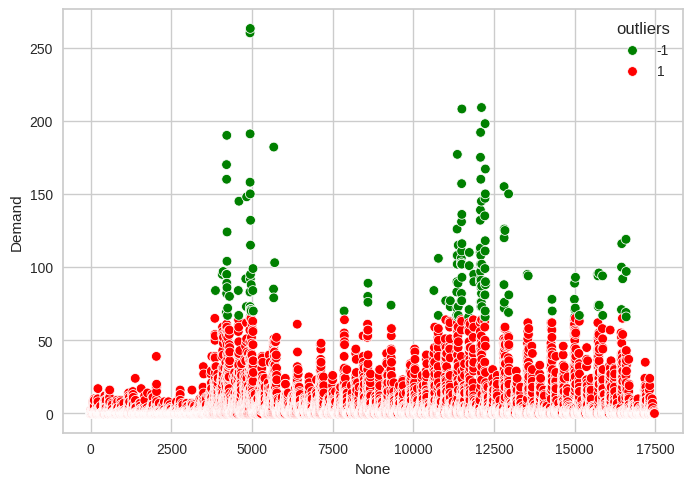

In [94]:
import seaborn as sns
sns.scatterplot(data=df, x=data.Demand.index, y='Demand', hue='outliers', palette=['green', 'red'])

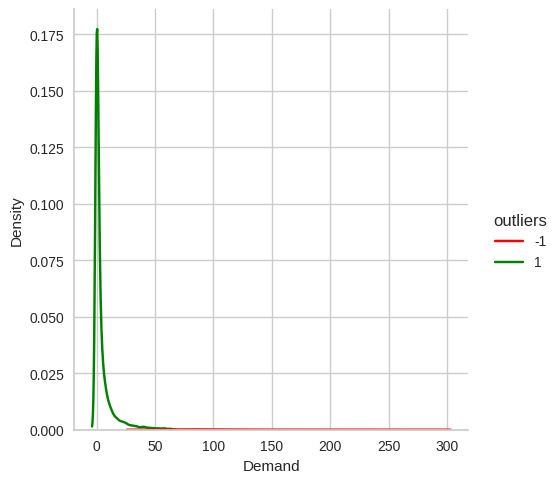

In [97]:
sns.displot(data=df, x='Demand', kind='kde', hue='outliers', palette=['red', 'green'])

In [98]:
normal_data = df[df['outliers']==1]

In [99]:
normal_data.drop('outliers', axis=1, inplace=True)

<ipython-input-99-4d0135231fd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data.drop('outliers', axis=1, inplace=True)


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X = normal_data.drop("Demand", axis=1)

In [102]:
y = normal_data.Demand

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
from lightgbm import LGBMRegressor

In [110]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [105]:
light_model = LGBMRegressor()

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV

grid_search = GridSearchCV(estimator=light_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
#tuning can be tricky and take a long time, so pro tip is to take smaller subset of data

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 13840, number of used features: 5
[LightGBM] [Info] Start training from score 4.577890


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'num_leaves': [15, 31, 63],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [112]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [106]:
##light_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 13840, number of used features: 5
[LightGBM] [Info] Start training from score 4.577890


LGBMRegressor()

In [107]:
light_pred = light_model.predict(X_test)

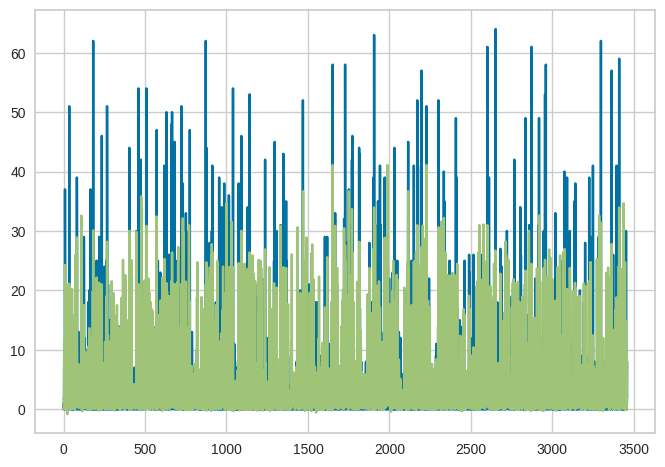

In [113]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(y_test))], y_test)
plt.plot([i for i in range(len(y_test))], y_pred)

plt.show()

In [114]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6158156140853726